# a)Load the dataset and explore its structure

Shape of the data: (1797, 64)
Shape of the target: (1797,)


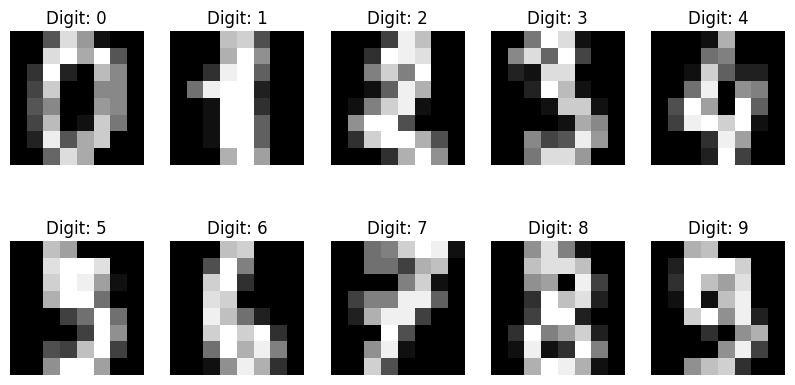

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Explore the structure of the dataset
print("Shape of the data:", X.shape)
print("Shape of the target:", y.shape)

# Plot at least one image for each digit
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis('off')
plt.show()


# b) Pre-process the dataset


In [2]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# c) Use KMeans algorithm to create clusters


In [3]:
from sklearn.cluster import KMeans

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

# Predict the clusters
kmeans_labels = kmeans.labels_

# Evaluate the clustering
print("KMeans clustering results:")
for i in range(10):
    print(f"Cluster {i}: {np.where(kmeans_labels == i)[0]}")


KMeans clustering results:
Cluster 0: [ 263  283  317  393  403  413  429  438  447  467  494  498  655  673
  689  732  757  765  771  998 1009 1012 1022 1023 1033 1043 1070 1467
 1572 1708]
Cluster 1: [  15   25   32   33   35   46   71   91  102  103  109  117  133  135
  145  155  162  163  165  176  201  204  230  237  245  246  271  281
  288  302  327  330  365  376  391  401  411  418  419  432  460  488
  495  503  506  548  625  651  661  671  679  681  692  717  720  755
  763  766  781  791  801  808  809  811  822  847  850  878  885  893
  896  910 1003 1034 1044 1054 1061 1062 1064 1075 1101 1129 1144 1147
 1172 1182 1189 1190 1192 1195 1197 1202 1210 1228 1231 1233 1240 1259
 1260 1266 1274 1277 1302 1312 1319 1320 1322 1333 1396 1407 1420 1448
 1535 1550 1560 1568 1571 1575 1576 1578 1580 1582 1589 1614 1635 1643
 1650 1656 1657 1659 1662 1682 1690 1699 1700 1702 1707 1713 1765]
Cluster 2: [   4   11   14   21   24   27   41   42   47   54   56   64   68   70
   75   7

# d) Use Hierarchical clustering algorithm to detect the clusters

In [5]:
from sklearn.cluster import AgglomerativeClustering

# Create and fit the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Evaluate the clustering
print("Agglomerative clustering results:")
for i in range(10):
    print(f"Cluster {i}: {np.where(agg_labels == i)[0]}")

Agglomerative clustering results:
Cluster 0: [  15   25   32   33   35   46   69   71   87  102  109  117  135  145
  155  162  163  165  176  201  204  230  237  245  246  261  271  281
  288  289  291  302  330  358  365  373  376  391  401  411  418  419
  421  432  457  460  488  495  503  506  521  531  541  548  549  551
  562  587  590  618  625  633  636  651  661  671  678  679  681  692
  717  720  748  755  763  766  781  791  801  808  809  811  822  847
  850  878  885  893  896  910  938  973 1003 1021 1034 1044 1054 1061
 1062 1064 1075 1098 1101 1129 1136 1144 1147 1162 1172 1182 1189 1190
 1192 1203 1210 1228 1231 1259 1264 1266 1274 1277 1292 1302 1312 1319
 1320 1322 1333 1358 1389 1396 1404 1407 1420 1430 1440 1447 1448 1450
 1461 1486 1489 1517 1532 1535 1550 1560 1568 1575 1576 1578 1582 1589
 1614 1617 1643 1650 1656 1657 1659 1662 1672 1682 1692 1699 1700 1702
 1713 1738 1741 1769 1776 1784 1787]
Cluster 1: [   1    2    8   11   18   21   28   38   40   42   47

# e) Evaluate the quality of the models


In [6]:
from sklearn.metrics import silhouette_score

# Evaluate KMeans
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

# Evaluate Agglomerative Clustering
agg_silhouette = silhouette_score(X_scaled, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")


KMeans Silhouette Score: 0.13558208876901615
Agglomerative Clustering Silhouette Score: 0.12532527779196986


# f) Assign a label to each cluster


In [7]:
from scipy.stats import mode

def assign_cluster_labels(cluster_labels, true_labels, n_clusters=10):
    cluster_to_digit = {}
    for i in range(n_clusters):
        labels_in_cluster = true_labels[cluster_labels == i]
        most_common = mode(labels_in_cluster).mode[0]
        cluster_to_digit[i] = most_common
    return cluster_to_digit

# Assign labels to KMeans clusters
kmeans_cluster_to_digit = assign_cluster_labels(kmeans_labels, y)
print("KMeans cluster to digit mapping:", kmeans_cluster_to_digit)

# Assign labels to Agglomerative clusters
agg_cluster_to_digit = assign_cluster_labels(agg_labels, y)
print("Agglomerative cluster to digit mapping:", agg_cluster_to_digit)

# Map the cluster labels to digit labels
kmeans_digit_labels = np.array([kmeans_cluster_to_digit[label] for label in kmeans_labels])
agg_digit_labels = np.array([agg_cluster_to_digit[label] for label in agg_labels])


KMeans cluster to digit mapping: {0: 7, 1: 5, 2: 4, 3: 7, 4: 6, 5: 0, 6: 2, 7: 3, 8: 1, 9: 8}
Agglomerative cluster to digit mapping: {0: 5, 1: 8, 2: 2, 3: 2, 4: 3, 5: 0, 6: 6, 7: 7, 8: 4, 9: 7}


/tmp/ipykernel_57779/3930613683.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  most_common = mode(labels_in_cluster).mode[0]
